# Iris flower classification(TASK-1)

In [69]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [70]:
data=pd.read_csv("C:\Desktop\Iris.csv")

In [71]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
data.shape

(150, 6)

In [73]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [74]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
data.size

900

In [77]:
#checking for null vqalues
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [78]:
data.drop(columns='Id',axis=0,inplace=True)

In [79]:
data_split=data.Species.str.split('-',n=-1,expand=True)
data_split.drop(columns=0,axis=1,inplace=True)
data_split

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [80]:
data_full=data.join(data_split)
data_full

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [81]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [82]:
data_full.rename({1:'Species1'},axis=1,inplace=True)
data_full

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [83]:
data_full.drop(columns='Species',axis=1,inplace=True)
data_full

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [84]:
data_full.shape

(150, 5)

In [86]:
data_full.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species1         0
dtype: int64

In [87]:
data_full.corr()

C:\Users\arpit\AppData\Local\Temp\ipykernel_10832\3692325709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_full.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [88]:
data_full.Species1.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species1, dtype: int64

In [89]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

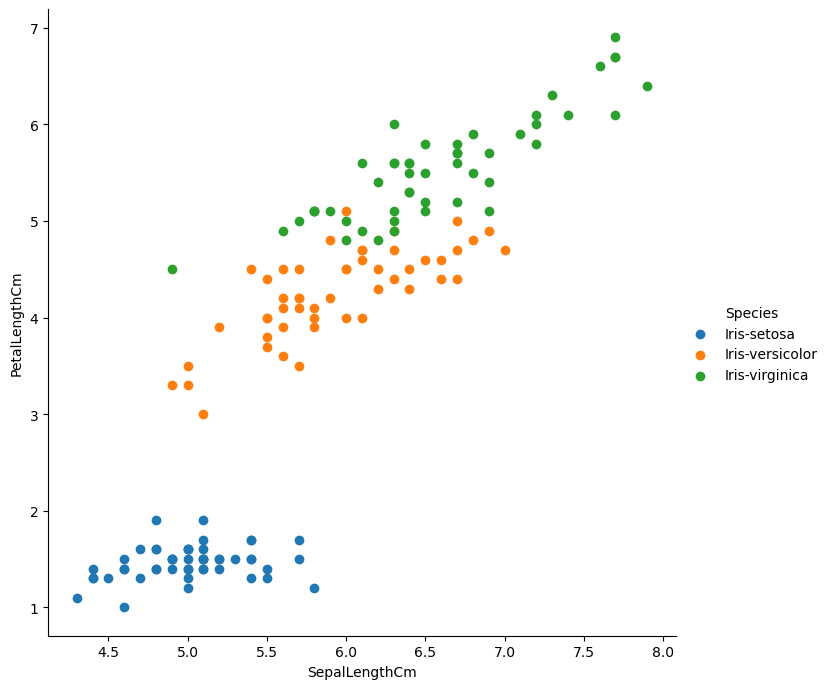

In [90]:
sns.FacetGrid(data,hue="Species",height=7).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()

# Train the model with iris dataset

In [91]:
x=data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y=data[["Species"]].values

In [ ]:
Model=LogisticRegression()
Model.fit(x,y)

In [93]:
Model.score(x,y).round(4)

0.9733

In [94]:
Actual=y
predicted=Model.predict(x)

In [95]:
from sklearn import metrics
print(metrics.classification_report(Actual,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [96]:
print(metrics.confusion_matrix(Actual,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [97]:
predicted=Model.predict([[4.6,3.2,1.4,0.2]])
predicted

array(['Iris-setosa'], dtype=object)

In [98]:
predicted=Model.predict([[5.8,2.7,4.1,1]])
predicted

array(['Iris-versicolor'], dtype=object)

In [99]:
predicted=Model.predict([[7.7,2.8,6.7,2]])
predicted

array(['Iris-virginica'], dtype=object)

In [100]:
predicted=Model.predict([[4.5,8,4.5,2]])
predicted

array(['Iris-setosa'], dtype=object)

In [101]:
predicted=Model.predict([[1.9,4.2,2.7,1],[4.1,6,2,3],[1.0,2.5,6,0.4]])
predicted

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)